## Importing Library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Data Cleaning

In [10]:
nutrition_df = pd.read_csv ('openfoodfacts_cleaned.csv')
nutrition_df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17392\3553640250.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  nutrition_df = pd.read_csv ('openfoodfacts_cleaned.csv')


,Unnamed: 0,product_name,generic_name,quantity,brands,categories_en,origins_en,countries_en,traces_en,additives_n,...,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,3,Skyr,NaN,480 g,Danone,"Dairies,Fermented foods,Fermented milk product...",NaN,France,NaN,NaN,...,10.0,0.09,0.036,NaN,NaN,NaN,NaN,NaN,NaN,-5.0
1,4,Vitória crackers,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,...,7.8,1.40,0.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,Spain,NaN,NaN,...,15.7,2.10,0.840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,Blueberry Cobbler Coffee,NaN,NaN,NaN,NaN,NaN,United States,NaN,NaN,...,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,...,0.2,2.04,0.816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
nutrition_df.isna().sum()

Unnamed: 0                                                     0
product_name                                                   0
generic_name                                             1870120
quantity                                                 1344209
brands                                                    838120
categories_en                                             931045
origins_en                                               1897307
countries_en                                                   0
traces_en                                                1839690
additives_n                                              1255057
additives_en                                             1554377
nutriscore_score                                          963857
food_groups_en                                           1105768
ecoscore_score                                           1387602
ecoscore_grade                                                 0
main_category_en         

In [12]:
columns_to_drop = [
    'Unnamed: 0', 'generic_name', 'quantity', 'brands', 'categories_en', 'origins_en',
    'traces_en', 'additives_n', 'additives_en', 'food_groups_en', 'ecoscore_score',
    'ecoscore_grade', 'main_category_en', 'monounsaturated-fat_100g',
    'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'vitamin-a_100g',
    'vitamin-c_100g', 'potassium_100g', 'calcium_100g', 'iron_100g',
    'salt_100g', 'carbohydrates_100g', 'countries_en', 'fat_100g','nutrition-score-fr_100g'
]

nutrition_df = nutrition_df.drop(columns=columns_to_drop)
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Skyr,-5.0,57.0,0.10,3.9,NaN,10.0,0.036,NaN
1,Vitória crackers,NaN,375.0,3.08,15.0,NaN,7.8,0.560,NaN
2,Hamburguesas de ternera 100%,NaN,874.9,6.10,1.0,NaN,15.7,0.840,NaN
3,Blueberry Cobbler Coffee,NaN,0.0,0.00,0.0,0.0,0.0,0.000,NaN
4,Sauce Sweety chili 0%,NaN,21.0,0.00,0.4,NaN,0.2,0.816,NaN


In [13]:
nutrition_df['fruits-vegetables-nuts-estimate-from-ingredients_100g'].fillna(0, inplace=True)
nutrition_df['fiber_100g'].fillna(0, inplace=True)
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Skyr,-5.0,57.0,0.10,3.9,0.0,10.0,0.036,0.0
1,Vitória crackers,NaN,375.0,3.08,15.0,0.0,7.8,0.560,0.0
2,Hamburguesas de ternera 100%,NaN,874.9,6.10,1.0,0.0,15.7,0.840,0.0
3,Blueberry Cobbler Coffee,NaN,0.0,0.00,0.0,0.0,0.0,0.000,0.0
4,Sauce Sweety chili 0%,NaN,21.0,0.00,0.4,0.0,0.2,0.816,0.0


In [14]:
nutrition_df.duplicated().sum()

112655

In [15]:
nutrition_df = nutrition_df.drop_duplicates()
nutrition_df = nutrition_df.dropna()
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Skyr,-5.0,57.0,0.1,3.9,0.0,10.0,0.036,0.0
6,Pur jus de pomme,9.0,63.0,0.0,15.5,0.0,0.2,0.000,0.0
7,Salade de carottes râpées,-4.0,32.0,0.1,3.9,0.0,0.9,0.168,0.0
13,Tarte noix de coco,14.0,381.0,15.5,21.9,4.4,4.6,0.040,0.0
21,Compote de poire,-2.0,157.0,0.0,27.0,3.6,0.6,0.000,0.0


In [16]:
nutrition_df['energy_kj'] = nutrition_df['energy-kcal_100g'] * 4.184
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,energy_kj
0,Skyr,-5.0,57.0,0.1,3.9,0.0,10.0,0.036,0.0,238.488
6,Pur jus de pomme,9.0,63.0,0.0,15.5,0.0,0.2,0.000,0.0,263.592
7,Salade de carottes râpées,-4.0,32.0,0.1,3.9,0.0,0.9,0.168,0.0,133.888
13,Tarte noix de coco,14.0,381.0,15.5,21.9,4.4,4.6,0.040,0.0,1594.104
21,Compote de poire,-2.0,157.0,0.0,27.0,3.6,0.6,0.000,0.0,656.888


Convert 'nutriscore_score' to categorical

In [17]:
def assign_grade(score):
    if -15 <= score <= -1:
        return "A"
    elif 0 <= score <= 2:
        return "B"
    elif 3 <= score <= 10:
        return "C"
    elif 11 <= score <= 18:
        return "D"
    elif 19 <= score <= 40:
        return "E"
    else:
        return "Invalid Score"

In [18]:
nutrition_df['nutriscore_grade'] = nutrition_df['nutriscore_score'].apply(assign_grade)
nutrition_df.head()

,product_name,nutriscore_score,energy-kcal_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,energy_kj,nutriscore_grade
0,Skyr,-5.0,57.0,0.1,3.9,0.0,10.0,0.036,0.0,238.488,A
6,Pur jus de pomme,9.0,63.0,0.0,15.5,0.0,0.2,0.000,0.0,263.592,C
7,Salade de carottes râpées,-4.0,32.0,0.1,3.9,0.0,0.9,0.168,0.0,133.888,A
13,Tarte noix de coco,14.0,381.0,15.5,21.9,4.4,4.6,0.040,0.0,1594.104,D
21,Compote de poire,-2.0,157.0,0.0,27.0,3.6,0.6,0.000,0.0,656.888,A


In [19]:
nutrition_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956387 entries, 0 to 1982823
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   product_name                                           956387 non-null  object 
 1   nutriscore_score                                       956387 non-null  float64
 2   energy-kcal_100g                                       956387 non-null  float64
 3   saturated-fat_100g                                     956387 non-null  float64
 4   sugars_100g                                            956387 non-null  float64
 5   fiber_100g                                             956387 non-null  float64
 6   proteins_100g                                          956387 non-null  float64
 7   sodium_100g                                            956387 non-null  float64
 8   fruits-vegetables-nuts-estimate-from-i

In [20]:
nutrition_df.to_csv('cleaned_dataset.csv', index=False)

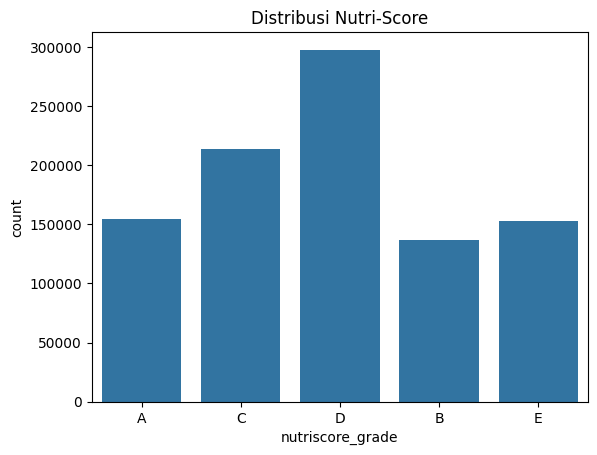

In [21]:
# Visualization Nutrition Grade
sns.countplot(x='nutriscore_grade', data=nutrition_df)
plt.title('Distribusi Nutri-Score')
plt.show()

In [22]:
# Features and target
X = nutrition_df[['saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
        'sodium_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g', 'energy_kj']]
y = nutrition_df['nutriscore_grade']

In [23]:
print("Class distribution before SMOTE:", Counter(y))

Class distribution before SMOTE: Counter({'D': 298074, 'C': 213823, 'A': 154419, 'E': 153114, 'B': 136957})


In [ ]:
# Apply Random Under-Sampling
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

print("Class distribution after under-sampling:", Counter(y_resampled))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Class distribution after under-sampling: Counter({'A': 136957, 'B': 136957, 'C': 136957, 'D': 136957, 'E': 136957})


In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Training set size:", X_train.shape, "Validation set size:", X_val.shape, "Test set size:", X_test.shape)

Training set size: (359511, 7) Validation set size: (119838, 7) Test set size: (205436, 7)


# Model

In [27]:
def create_model(input_dim, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(1024, activation='relu'),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
input_dim = X_train.shape[1]
num_classes = len(label_encoder.classes_)
model = create_model(input_dim, num_classes)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 708,229 (2.70 MB)

 Trainable params: 707,973 (2.70 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
early_stopping = EarlyStopping(
    monitor='val_loss', patience=20, restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200, 
    batch_size=512, 
    callbacks=[early_stopping,reduce_lr],
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.5331 - loss: 1.0496 - val_accuracy: 0.5845 - val_loss: 0.9384 - learning_rate: 0.0100
Epoch 2/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.6154 - loss: 0.8923 - val_accuracy: 0.5701 - val_loss: 0.9724 - learning_rate: 0.0100
Epoch 3/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.6301 - loss: 0.8683 - val_accuracy: 0.6351 - val_loss: 0.8636 - learning_rate: 0.0100
Epoch 4/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.6367 - loss: 0.8550 - val_accuracy: 0.6299 - val_loss: 0.8727 - learning_rate: 0.0100
Epoch 5/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.6402 - loss: 0.8450 - val_accuracy: 0.6438 - val_loss: 0.8397 - learning_rate: 0.0100
Epoch 6/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.6443 - loss: 0.8360 - val_accuracy: 0.6101 - val_loss: 0.9050 - learning_rate: 0.0100
Epoch 7/200
703/703 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.6

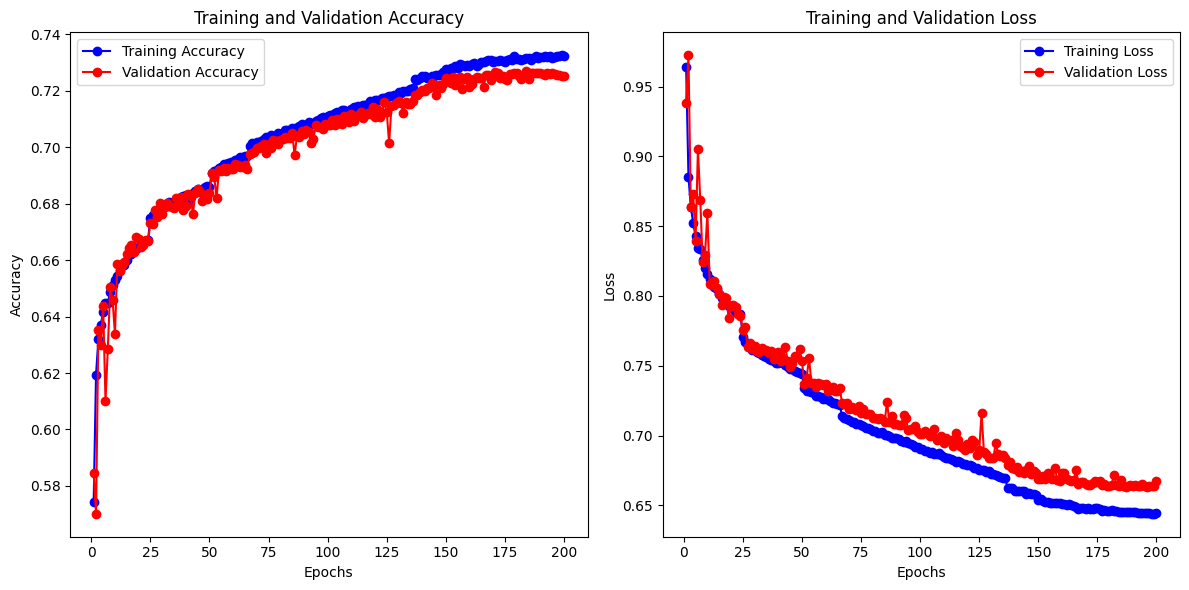

In [31]:
# Retrieve training metrics from the history object
history_dict = history.history

# Extract values for each metric
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Create a range for the epochs
epochs = range(1, len(accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Test Loss: 0.7920
Test Accuracy: 0.73
6420/6420 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     41078
           1       0.66      0.67      0.67     41183
           2       0.65      0.60      0.62     40969
           3       0.70      0.70      0.70     40829
           4       0.89      0.85      0.87     41377

    accuracy                           0.73    205436
   macro avg       0.73      0.73      0.73    205436
weighted avg       0.73      0.73      0.73    205436



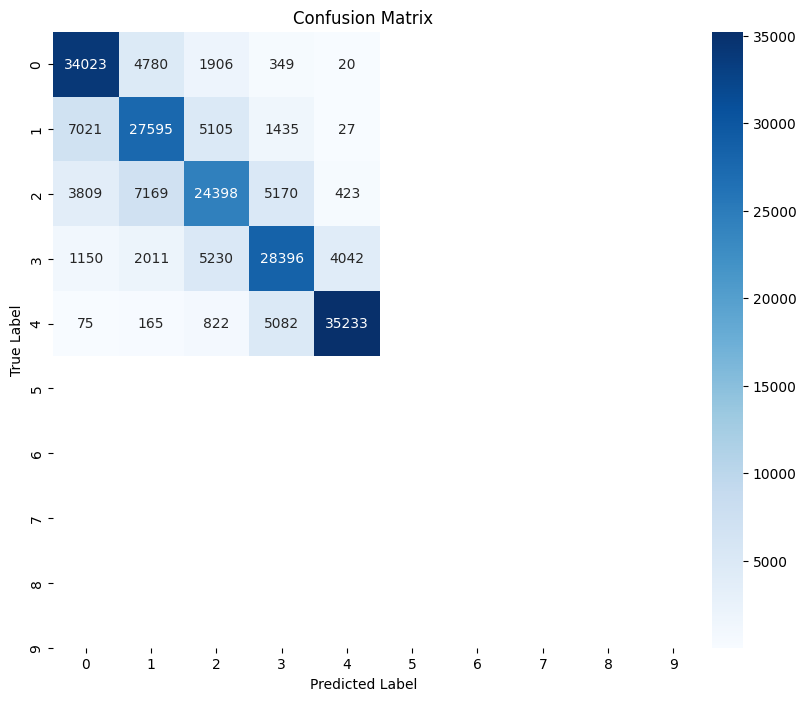

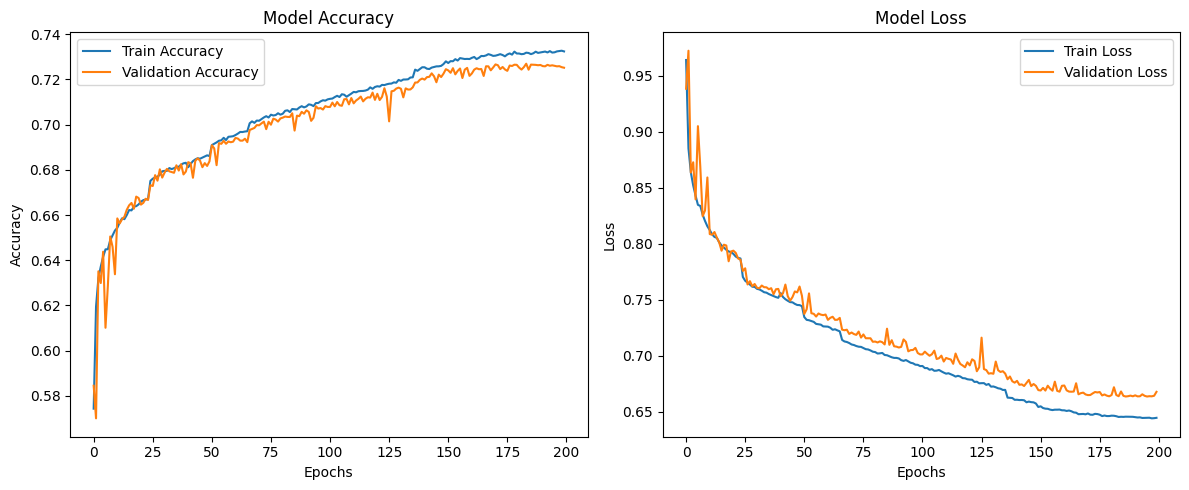

In [34]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1) 

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Visualize Training History
def plot_training_history(history):
    # Accuracy Plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.tight_layout()
    plt.show()

# Call the function to plot history
plot_training_history(history)


In [40]:
new_data = pd.DataFrame({
  'saturated-fat_100g': [70, 0.1, 2.0, 1.2, 3.4, 0.8, 2.5, 1.7, 0.5, 0.9, 1.3, 0.6, 2.8, 3.0, 1.9, 0.4, 1.1, 2.2, 1.8, 0.7, 3.2, 1.4],
    'sugars_100g': [50, 3.9, 2.8, 4.1, 5.0, 1.9, 2.5, 3.4, 4.7, 3.1, 2.2, 4.0, 3.3, 5.5, 4.9, 2.7, 3.8, 4.4, 2.0, 4.6, 5.1, 3.7],
    'fiber_100g': [2.0, 0.0, 1.5, 1.8, 0.7, 2.1, 1.0, 1.9, 0.5, 0.8, 2.3, 1.6, 2.4, 0.4, 1.2, 0.9, 2.2, 0.3, 1.1, 1.4, 2.5, 1.7],
    'proteins_100g': [4.0, 10.0, 5.5, 3.8, 7.2, 6.1, 8.4, 9.0, 4.3, 7.0, 5.0, 6.8, 7.9, 5.2, 8.0, 4.5, 6.4, 3.9, 9.5, 7.7, 8.6, 4.8],
    'sodium_100g': [0.3, 0.036, 0.12, 0.24, 0.05, 0.18, 0.15, 0.28, 0.09, 0.32, 0.06, 0.2, 0.11, 0.19, 0.08, 0.1, 0.17, 0.13, 0.25, 0.07, 0.04, 0.22],
    'fruits-vegetables-nuts-estimate-from-ingredients_100g': [50, 0.0, 60, 30, 40, 25, 35, 10, 55, 5, 45, 20, 65, 15, 75, 50, 0, 85, 90, 70, 80, 95],
    'energy_kj': [1000, 238.488, 520, 450, 600, 310, 480, 520, 430, 550, 490, 420, 530, 610, 470, 400, 560, 510, 460, 580, 620, 495]
})

# Normalisasi data baru menggunakan scaler yang sama
new_data_scaled = scaler.transform(new_data)

In [41]:
predictions = model.predict(new_data_scaled)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[3.37093396e-12 2.10957607e-09 2.33177474e-07 1.54976588e-04
  9.99844790e-01]
 [8.92290533e-01 3.32455337e-02 2.56070867e-02 4.88562398e-02
  5.49531819e-07]
 [4.44256693e-01 5.36741972e-01 1.84368584e-02 5.62391011e-04
  2.11962265e-06]
 [6.82447627e-02 7.53262997e-01 1.71136186e-01 7.30463909e-03
  5.13912892e-05]
 [4.56248689e-03 4.00194973e-01 5.09052694e-01 8.59636441e-02
  2.26174641e-04]
 [6.62280917e-01 3.13727468e-01 2.29011886e-02 1.08596182e-03
  4.39607766e-06]
 [1.76227167e-01 7.04548717e-01 1.08747117e-01 1.04525350e-02
  2.44664225e-05]
 [2.97080487e-01 5.63242912e-01 1.16390698e-01 2.30681058e-02
  2.17762907e-04]
 [1.99930534e-01 6.49608910e-01 1.36310771e-01 1.38314739e-02
  3.18294711e-04]
 [2.10730210e-01 6.58990204e-01 1.08733542e-01 2.13316716e-02
  2.14379368e-04]
 [3.14285547e-01 6.42983973e-01 4.11677212e-02 1.55062461e-03
  1.21541489e-05]
 [6.45598352e-01 2.89468527e-01 5.56896143e-02 9.10685677e-03
  1.36646297e-04]
 [

In [42]:
predicted_class = tf.argmax(predictions, axis=1).numpy()
predicted_label = label_encoder.inverse_transform(predicted_class)

print(f'Prediksi kelas untuk data baru: {predicted_label}')

Prediksi kelas untuk data baru: ['E' 'A' 'B' 'B' 'C' 'A' 'B' 'B' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'B'
 'A' 'A' 'A' 'A']


In [43]:
# Save the trained model
model.save('nutrisee_model.h5')
print("Model saved as 'nutrisee_model.h5'")


Model saved as 'nutrisee_model.h5'
